In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm
%matplotlib inline

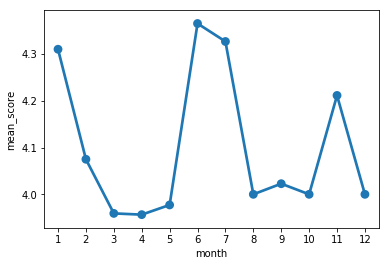

In [2]:
reviews = pd.read_html('mon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews[reviews['year']==2017]
mean_stars = reviews.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='month', y='mean_score', data=mean_stars)

In [7]:
#list(reviews['user_id'])

In [8]:
# reviews = pd.read_html('gordon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
# stars['date'] = pd.to_datetime(stars['date'])
# stars['year'], stars['month'] = stars['date'].dt.year, stars['date'].dt.month
# stars = stars[stars['year']>=2015]
# mean_stars = stars.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
# ax = sns.pointplot(x='month', y='mean_score', hue='year', data=mean_stars)

In [9]:
low_reviews = reviews[(reviews['year']==2017) & (reviews['month'].isin([3,4,5]))]
low_reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5
100,0cUaPoyrcyf-GDukR75pbQ,4JNXUYY8wbaaDmk3BPzlWw,j5ezF5mEGpnDwdTmAHci7Q,4,2017-03-07,If you've been to Paris... this is a poor subs...,0,0,0,2017,3
103,0dw964e_pXFfGMLuvQZ7zA,4JNXUYY8wbaaDmk3BPzlWw,PXPs4ZY7c77MejUVv6MLVw,5,2017-03-17,Mon Ami Gabi has been a must-stop breakfast sp...,0,0,0,2017,3


In [10]:
list(low_reviews['user_id'])[:5]

['EMMKdK1cGrLSo08wgSYHJQ',
 'SRMOslD85xkPQzfMIUsQNQ',
 'WgRKynZBQSdrSYOCAf3JXg',
 'j5ezF5mEGpnDwdTmAHci7Q',
 'PXPs4ZY7c77MejUVv6MLVw']

In [12]:
mon_users = pd.read_csv('mon_users.csv')
mon_users.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,--8ELb8W1afbyP21EZStPg,Mi Sou,20,2011-10-25 00:00:00,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,-0tLDaIzN1Gbxc51Bxad4A,Rana,33,2013-05-14 00:00:00,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,-9ZFoRZpBAsf1ckY3aeyrg,Alexandra,91,2013-01-14 00:00:00,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,-9_Nz6wJ9Rj0q7kq6YJ-MA,Olga,125,2013-05-26 00:00:00,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,-AkgXdzDcdEvyXgKYJQW4w,Karli,322,2013-01-09 00:00:00,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [13]:
users = mon_users.drop(['id', 'name', 'yelping_since'], axis=1)
users.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,20,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,33,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,91,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,125,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,322,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
np.where(pred>0)

(array([197, 311, 489]),)

In [15]:
#DBSCAN
dbscan = DBSCAN(eps=2)
pred = dbscan.fit_predict(x)
influencers = np.where(pred==-1)[0]
influencers

array([  9,  15,  54,  87, 119, 156, 177, 197, 214, 259, 296, 302, 311,
       330, 333, 335, 368, 429, 489, 559, 562, 573])

In [16]:
influ = list(mon_users.iloc[influencers, :]['id'])

In [17]:
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
44,-Lk8DRj59iWk09iXGugSmA,4JNXUYY8wbaaDmk3BPzlWw,q3eLont3I-8fBKbekmX_xg,5,2017-10-14,"Love, love, love this place! We go every time ...",0,0,0,2017,10
47,-NQ4dmUjBjpauRmydtROHg,4JNXUYY8wbaaDmk3BPzlWw,EK8lYaib-nW6RH1VxapA-g,5,2017-01-30,Gotta hand it to them.. They get packed but ca...,0,0,0,2017,1
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5


In [18]:
reviews[(reviews['month'].isin([8,9,10])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5
2,13,13,13,13,13,13,13,13,13,13
3,22,22,22,22,22,22,22,22,22,22
4,43,43,43,43,43,43,43,43,43,43
5,64,64,64,64,64,64,64,64,64,64


In [19]:
reviews[(reviews['month'].isin([6,7])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6
4,34,34,34,34,34,34,34,34,34,34
5,58,58,58,58,58,58,58,58,58,58


In [21]:
#reading reviews files for all 5 top restaurants
files = glob.glob('*.html')
df = pd.DataFrame()
for file in tqdm(files):
    reviews = pd.read_html(file, header=0)[0]
    if df.shape[0] == 0:
        df = reviews
    else:
        df = df.append(reviews)

100%|██████████| 5/5 [01:03<00:00, 12.70s/it]


In [22]:
df.shape

(22671, 9)

In [23]:
df.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool
0,--1h6ROOo2XEsLQK8uKvaQ,RESDUcs7fIiihp38-d6_6g,2rMCI2OU7ZIusbjnXGomdQ,4,2016-02-14 00:00:00,Mind you the wait time could be loooong! So br...,0,0,0
1,-28T41kjGIKfapLuPvS9Ow,RESDUcs7fIiihp38-d6_6g,QVrLRR_Q-gPq4EinMochpw,5,2015-02-12 00:00:00,Best in Las Vegas for a reason. Bacchanal seem...,0,0,0
2,-3EMV8zNQvOuWMjlddQeIQ,RESDUcs7fIiihp38-d6_6g,6HWYZmkibLA935-p3ACkRQ,1,2016-07-09 00:00:00,Wow! It was a huge disappointing experience at...,0,1,0
3,-3RQaujJxVDppbCWVLiJog,RESDUcs7fIiihp38-d6_6g,mC-Nq-FfHJb-8OTWOh0pxw,5,2014-01-04 00:00:00,Hands down one of the best buffets I've had in...,1,0,0
4,-4eA3A6hd1Ic29GmHthLdA,RESDUcs7fIiihp38-d6_6g,q448ePtKZhlma-AqG_Z97g,3,2016-11-30 00:00:00,First time trying out this place and it's okay...,0,0,1


Text(0,0.5,'Count')

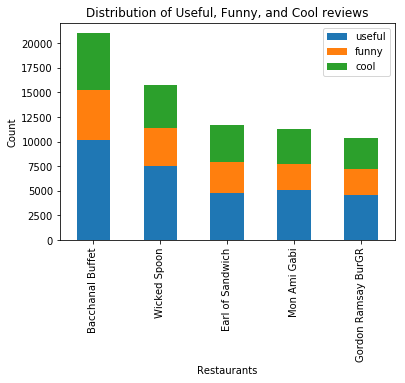

In [24]:
b_ids = df['business_id'].unique()
restaurants = pd.read_csv('restaurants.csv')
names = restaurants[restaurants['id'].isin(b_ids)]
data = pd.merge(df, names, left_on=['business_id'], right_on = ['id'], how = 'inner')
data = data.groupby('name')['useful', 'funny', 'cool'].sum()
data['total'] = data.sum(axis=1)
data.sort_values(by='total', ascending=False, inplace=True)
ax = data.iloc[:,:-1].plot(kind='bar', stacked=True)
ax.set_title('Distribution of Useful, Funny, and Cool reviews')
ax.set_xlabel('Restaurants')
ax.set_ylabel('Count')

In [20]:
## print all users to 
l = df['user_id'].unique()
print(len(l))
with open("temp.txt","w") as outfile:
    for item in l:
        outfile.write("\'%s\',\n"% item)

18591


In [21]:
df['user_id'].unique().shape

(18591,)

In [22]:
mon_users['id'].unique().shape

(579,)

In [83]:
### read all user data
all_users = pd.read_csv("top_rated_res_user.csv", sep = ",")
print(all_users.shape)
users = all_users.drop(['id', 'name', 'yelping_since'], axis=1)
users[users['review_count'] > 5000]

(18591, 20)


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2840,7764,123,139,113,272,3.49,36,23,7,4,14,137,219,97,97,67,78
7485,5344,3905,3876,3847,397,3.93,2104,183,246,113,232,1028,6677,3624,3624,1165,338
7807,8353,22628,19263,19369,417,3.58,1294,379,252,19,39,708,2312,1797,1797,933,819
17081,6653,1444,1142,1167,237,3.32,92,39,12,2,1,208,496,288,288,78,89


## Clustering analysis to find outlying users across 5 most reviewed restaurants

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
# we see that the class 1 are outliers

{0, 1}
cluster = 0 18564
cluster = 1 27


In [74]:
## analysing outliers in detail
outliers = np.where(pred == 1)[0]
users.iloc[outliers,:].tail()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
16073,2688,36573,36094,35824,935,3.09,10157,1562,844,598,457,5885,7113,13240,13240,5299,7130
16085,1167,31406,31284,31279,402,3.82,6466,360,422,159,74,1461,3100,5638,5638,2878,3127
17580,3253,48621,29166,38033,1266,3.42,2832,315,348,126,220,2968,11276,5481,5481,1251,451
17617,3172,12558,11284,14958,595,3.57,3806,252,259,140,153,2296,7056,4847,4847,1800,874
17809,2159,24482,24027,25391,567,3.83,18812,1013,1543,1443,357,3038,6724,11404,11404,4222,6771


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_red = pca.fit_transform(x)
print("Variance Explained :", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)

Variance Explained : 0.759036628359894 [0.68402683 0.0750098 ]


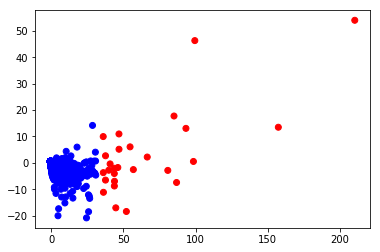

In [76]:
color = ['r' if c == 1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [77]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=20, eps = 0.01, metric="cosine", algorithm='brute').fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

{0, -1}
cluster = 0 12982
cluster = 1 0
cluster = -1 5609


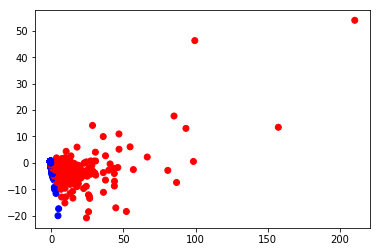

In [78]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [79]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, metric = 'cosine', n_iter = 250)
# x_red = tsne.fit_transform(x)
# print("divergence :",kl_divergence_)

In [80]:
# color = ['r' if c == -1 else 'b' for c in pred]
# plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)
outliers = np.where(pred == -1)[0]
users.iloc[outliers,:].head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,214,64,6,4,11,3.91,11,6,0,0,0,5,20,18,18,9,2
6,372,351,51,32,33,3.82,20,3,0,3,0,17,33,19,19,7,2
17,214,9,12,9,5,4.11,4,7,0,1,1,3,5,11,11,6,1
20,315,23,23,3,26,3.70,13,5,0,0,0,5,17,29,29,12,2
24,408,820,753,746,83,3.67,1004,91,72,80,32,200,1038,1209,1209,333,249


In [81]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=5, eps = 40, metric="manhattan").fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

{0, -1}
cluster = 0 18556
cluster = 1 0
cluster = -1 35


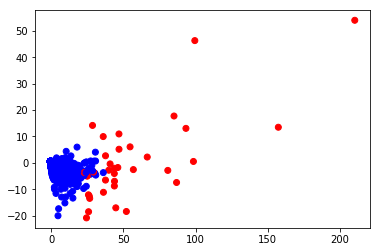

In [82]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

## Make a clustering function to return ids, and plot using different clustering methods and  params

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
def cluster(data, method, **args):
    print (args)
    """
    data : data frame with user information
    method: string
    args: parameters passed to the clustering method
        epsilon
        num_samples
    """
    data_drop = data.drop(['id', 'name', 'yelping_since'], axis=1)
    x = data_drop.values
    
    scaler = StandardScaler()
    
    outlier_ids = []
    outlier_cluster = 0

    ## PCA
    pca = PCA(n_components = 2)
    x_red = pca.fit_transform(x)
    print("METHOD :", method)
    if method == "kmeans":
        kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
        pred = kmeans.predict(x)
        outlier_cluster = np.argmin([list(pred).count(i) for i in set(pred)])
        outliers = np.where(pred == outlier_cluster)[0]
        
    if method == "dbscan":
        x = scaler.fit_transform(x)
        dbscan = DBSCAN(eps = args['eps'], min_samples = args['min_samples'], metric = args['metric']).fit(x)
        pred = dbscan.fit_predict(x)
        outliers = np.where(pred == -1)[0]
        outlier_cluster = -1
        
    outlier_ids = data.iloc[outliers, :]['id']
    
    
    print("Variance Explained :", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)
    
    ## Plotting
    color = ['r' if c == outlier_cluster else 'b' for c in pred]
    plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)
    plt.show()
    return outlier_ids, outliers
method1 = "dbscan"
method2 = "kmeans"

In [2]:
### users who rated top 5 restaurants
# all_users = pd.read_csv("../top_rated_res_user.csv", sep = ",")
# all_users.shape

NameError: name 'pd' is not defined

In [ ]:
# out_ids, _ = cluster(all_users, method2, min_samples = 5, eps = 60,  metric = "manhattan")
# print(len(out_ids))

In [ ]:
# out_ids,_ = cluster(all_users, method1, min_samples = 5, eps = 45,  metric = "manhattan")
# print(len(out_ids))

### get data for 5 restaurants with lesser number of reviews

In [3]:
#reading reviews files for all 5 top restaurants
files = glob.glob('../lesser_reviews_restaurants/*.html')
df_small = pd.DataFrame()
for file in tqdm(files):
    reviews = pd.read_html(file, header=0)[0]
    if df_small.shape[0] == 0:
        df_small = reviews
    else:
        df_small = df_small.append(reviews)

NameError: name 'glob' is not defined

In [4]:
l = df_small['user_id'].unique()
print(len(l))
with open("../temp_small.txt","w") as outfile:
    for item in l:
        outfile.write("\'%s\',\n"% item)
print(df_small['user_id'].unique().shape)

NameError: name 'df_small' is not defined

### Cluster for lesser reviewed restaurants

In [11]:
### users who rated top 5 restaurants
small_users = pd.read_csv("../lesser_review_users.csv", sep = ",")
small_users.shape

(6525, 20)

{'min_samples': 5, 'eps': 60, 'metric': 'manhattan'}
METHOD : kmeans
Variance Explained : 0.7213099522641476 [0.6049616  0.11634835]
42


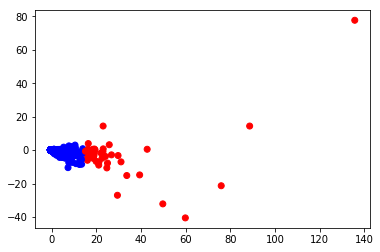

In [12]:
small_out_ids,_ = cluster(small_users, method2, min_samples = 5, eps = 60,  metric = "manhattan")
print(len(small_out_ids))

{'min_samples': 5, 'eps': 25, 'metric': 'manhattan'}
METHOD : dbscan
Variance Explained : 0.7213099522641475 [0.6049616  0.11634835]
37


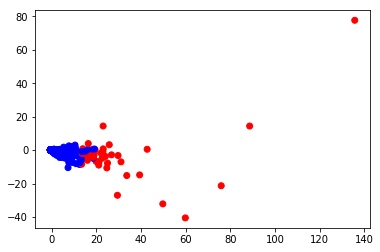

In [13]:
small_out_ids,_ = cluster(small_users, method1, min_samples = 5, eps = 25,  metric = "manhattan")
print(len(small_out_ids))

## Preparing the data and doing a significance test

In [14]:
thres = 30

def get_rolling(users_df, df, thres, outliers):
#     reviews = pd.read_html(file, header=0)[0]
    reviews = df
    reviews['date'] = pd.to_datetime(reviews['date'])
    reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
    reviews = reviews.sort_values(by=['date'])
    reviews['prev_date'] = reviews['date'] + pd.DateOffset(days=-thres)
    reviews['after_date'] = reviews['date'] + pd.DateOffset(days=thres)
    reviews['star_before']=''
    reviews['star_after']=''
    l1, l2 = [], []

    for i in range(reviews.shape[0]):
        before_date = reviews.iloc[i, :]['prev_date']
        curr_date = reviews.iloc[i, :]['date']
        after_date = reviews.iloc[i, :]['after_date']
        l1.append(reviews[(reviews['date']>=before_date) & (reviews['date']<curr_date)]['stars'].mean())
        l2.append(reviews[(reviews['date']>curr_date) & (reviews['date']<=after_date)]['stars'].mean())
    
    reviews["star_before"] = l1
    reviews["star_after"] = l2
    reviews['star_diff'] = reviews["star_after"] - reviews["star_before"]
    
    influencers_ids = list(users_df.iloc[outliers,:]['id'])
    influencers_reviews = reviews[reviews['user_id'].isin(influencers_ids)]
    influencers_reviews = influencers_reviews.dropna()
    return influencers_reviews['star_diff'].values
    

### read review data for highly reviewed restaurants

In [9]:
files = glob.glob('../*.html')
top_df_list = []
for file in tqdm(files):
    temp_df = pd.read_html(file, header=0)[0]
    top_df_list.append(temp_df)

100%|██████████| 5/5 [01:02<00:00, 12.42s/it]


In [10]:
top_users = pd.read_csv("../top_rated_res_user.csv", sep = ",")
top_users.shape

(18591, 20)

### read review data for lesser reviewed restaurants

In [11]:
files = glob.glob('../lesser_reviews_restaurants/*.html')
less_df_list = []
for file in tqdm(files):
    temp_df = pd.read_html(file, header=0)[0]
    less_df_list.append(temp_df)

100%|██████████| 5/5 [00:17<00:00,  3.51s/it]


In [20]:
lesser_users = pd.read_csv("../lesser_Review_users.csv", sep = ",")
lesser_users.shape

(6525, 20)

In [15]:
from scipy import stats
def t_testing(users_df,df_list, outliers, thresh = 30):
    ### rolling
    mean_diff = []
    for reviews_df in tqdm(df_list):
        mean_diff.append(get_rolling(users_df, reviews_df, thres, outliers))
    mean_diff_total = [j for i in mean_diff for j in i]
    
    ### do t-test
    from scipy import stats
    t = stats.ttest_1samp(mean_diff_total,0)
    sigma  = np.std(mean_diff_total)
    n = len(mean_diff_total)
    mean = np.mean(mean_diff_total)
    conf_interval = stats.norm.interval(0.90, loc = mean, scale=sigma/np.sqrt(n))
    conf_interval_len = conf_interval[1] - conf_interval[0]
    return (conf_interval_len, conf_interval,t.pvalue)

## cluster top_users dataframe using various parameters
#### use different parameters for dbscan and do the t-test to get pvalue and confidence interval

{}
METHOD : kmeans
Variance Explained : 0.9629267095396823 [0.93079208 0.03213463]


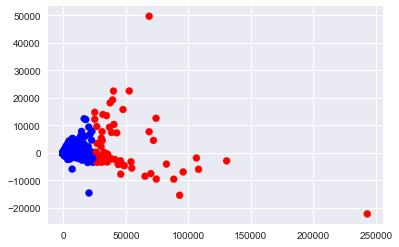


  0%|          | 0/5 [00:00<?, ?it/s]

66



100%|██████████| 5/5 [01:08<00:00, 13.77s/it]

(0.06563668904643633, (0.0061357515166875, 0.07177244056312382), 0.05467593042357695)


In [16]:
### K-means analysis
out_ids, outliers = cluster(top_users, "kmeans")
print(len(outliers))
print(t_testing(top_users, top_df_list, outliers))

eps =  30 min_samples =  3
{'metric': 'manhattan', 'eps': 30, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


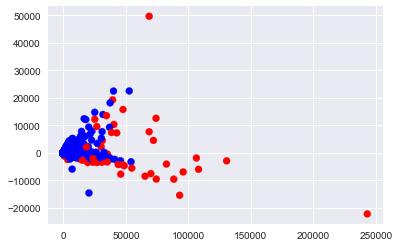

100%|██████████| 5/5 [01:06<00:00, 13.38s/it]


(0.07297982022917156, (-0.022722472394654296, 0.05025734783451726), 0.5389965133629134)
eps =  30 min_samples =  4
{'metric': 'manhattan', 'eps': 30, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9629267095396803 [0.93079208 0.03213463]


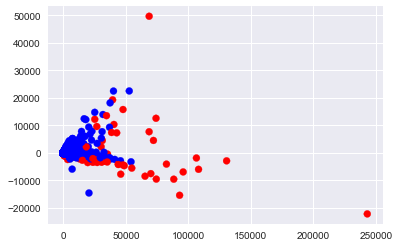

100%|██████████| 5/5 [01:12<00:00, 14.41s/it]


(0.06977071564402114, (-0.025239943683281505, 0.04453077196073964), 0.6522221400272972)
eps =  30 min_samples =  5
{'metric': 'manhattan', 'eps': 30, 'min_samples': 5}
METHOD : dbscan
Variance Explained : 0.962926709539682 [0.93079208 0.03213463]


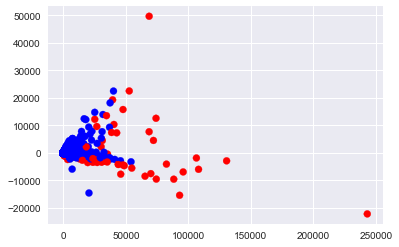

100%|██████████| 5/5 [01:14<00:00, 14.87s/it]


(0.06901812039203473, (-0.02432336536225496, 0.044694755029779765), 0.6304300737488723)
eps =  30 min_samples =  6
{'metric': 'manhattan', 'eps': 30, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9629267095396832 [0.93079208 0.03213463]


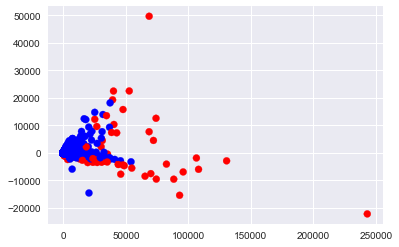

100%|██████████| 5/5 [01:04<00:00, 12.97s/it]


(0.06975136863653644, (-0.021673661696974676, 0.048077706939561766), 0.537293569987637)
eps =  35 min_samples =  3
{'metric': 'manhattan', 'eps': 35, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9629267095396798 [0.93079208 0.03213463]


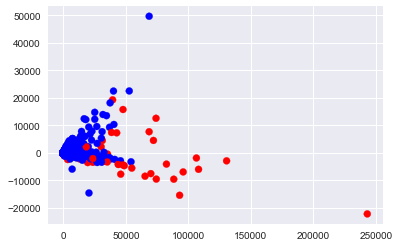

100%|██████████| 5/5 [01:10<00:00, 14.05s/it]


(0.08205759429893389, (-0.010656411900256221, 0.07140118239867767), 0.23152979919834996)
eps =  35 min_samples =  4
{'metric': 'manhattan', 'eps': 35, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


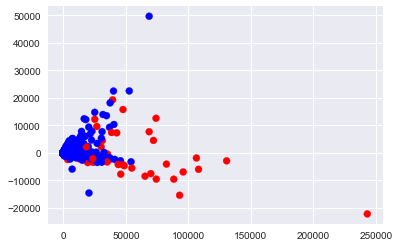

100%|██████████| 5/5 [01:06<00:00, 13.36s/it]


(0.08083642615587833, (-0.009254751930494392, 0.07158167422538393), 0.21280770125791687)
eps =  35 min_samples =  5
{'metric': 'manhattan', 'eps': 35, 'min_samples': 5}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


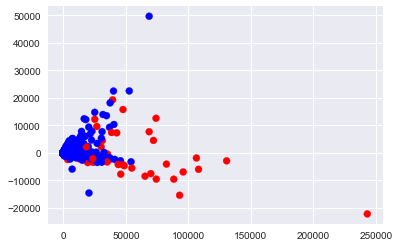

100%|██████████| 5/5 [01:05<00:00, 13.08s/it]


(0.08083642615587833, (-0.009254751930494392, 0.07158167422538393), 0.21280770125791687)
eps =  35 min_samples =  6
{'metric': 'manhattan', 'eps': 35, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9629267095396803 [0.93079208 0.03213463]


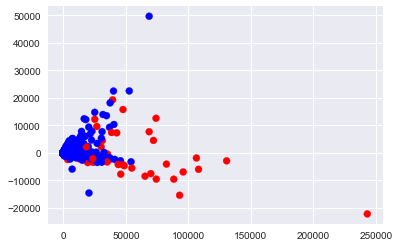

100%|██████████| 5/5 [01:05<00:00, 13.07s/it]


(0.08083642615587833, (-0.009254751930494392, 0.07158167422538393), 0.21280770125791687)
eps =  40 min_samples =  3
{'metric': 'manhattan', 'eps': 40, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9629267095396807 [0.93079208 0.03213463]


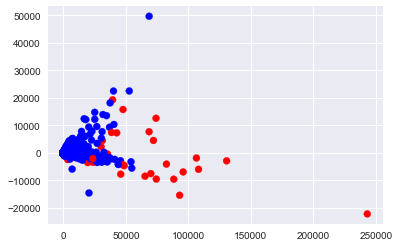

100%|██████████| 5/5 [01:05<00:00, 13.00s/it]


(0.0925419125859339, (-0.01177081530393366, 0.08077109728200024), 0.23012338752785924)
eps =  40 min_samples =  4
{'metric': 'manhattan', 'eps': 40, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9629267095396815 [0.93079208 0.03213463]


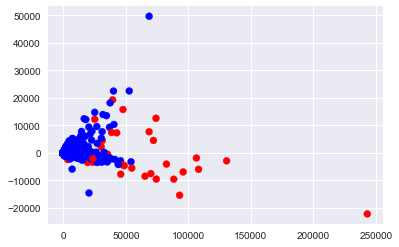

100%|██████████| 5/5 [01:07<00:00, 13.55s/it]


(0.08957975401070123, (-0.009353102093608005, 0.08022665191709322), 0.2029039904315627)
eps =  40 min_samples =  5
{'metric': 'manhattan', 'eps': 40, 'min_samples': 5}
METHOD : dbscan
Variance Explained : 0.9629267095396825 [0.93079208 0.03213463]


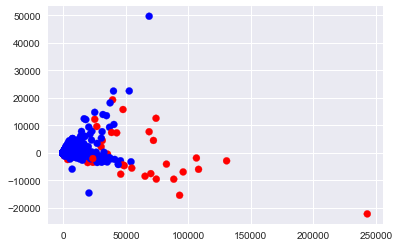

100%|██████████| 5/5 [01:05<00:00, 13.01s/it]


(0.08799393016628064, (-0.0077173621037125995, 0.08027656806256804), 0.18458472826340006)
eps =  40 min_samples =  6
{'metric': 'manhattan', 'eps': 40, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9629267095396817 [0.93079208 0.03213463]


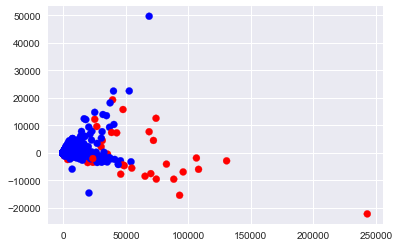

100%|██████████| 5/5 [01:04<00:00, 13.00s/it]


(0.08799393016628064, (-0.0077173621037125995, 0.08027656806256804), 0.18458472826340006)
eps =  45 min_samples =  3
{'metric': 'manhattan', 'eps': 45, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9629267095396807 [0.93079208 0.03213463]


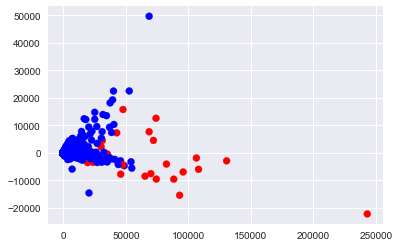

100%|██████████| 5/5 [01:22<00:00, 16.42s/it]


(0.10502713923953447, (-0.01960873832581536, 0.0854184009137191), 0.31370593935156643)
eps =  45 min_samples =  4
{'metric': 'manhattan', 'eps': 45, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9629267095396813 [0.93079208 0.03213463]


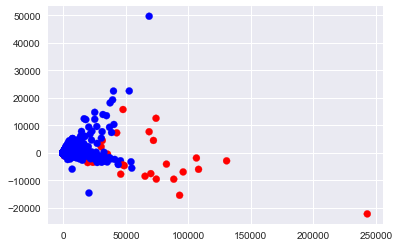

100%|██████████| 5/5 [01:05<00:00, 13.09s/it]


(0.10276099173982722, (-0.017900352164387977, 0.08486063957543925), 0.2947596085291689)
eps =  45 min_samples =  5
{'metric': 'manhattan', 'eps': 45, 'min_samples': 5}
METHOD : dbscan
Variance Explained : 0.9629267095396806 [0.93079208 0.03213463]


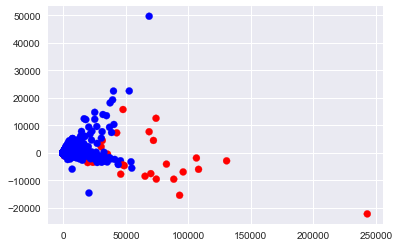

100%|██████████| 5/5 [01:08<00:00, 13.71s/it]


(0.10276099173982722, (-0.017900352164387977, 0.08486063957543925), 0.2947596085291689)
eps =  45 min_samples =  6
{'metric': 'manhattan', 'eps': 45, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9629267095396814 [0.93079208 0.03213463]


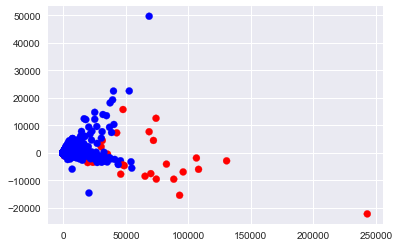

100%|██████████| 5/5 [01:12<00:00, 14.55s/it]

(0.10276099173982722, (-0.017900352164387977, 0.08486063957543925), 0.2947596085291689)


In [17]:
### dbscan with varying params
eps_list = [30, 35, 40, 45]
min_samples_list = [3,4,5,6]
# eps_list = [40]
# min_samples_list = [5]
for eps in eps_list:
    for min_samples in min_samples_list:
        print("eps = ", eps, "min_samples = ", min_samples)
        out_ids, outliers = cluster(top_users, "dbscan", min_samples = min_samples, eps = eps,  metric = "manhattan")
        print(t_testing(top_users, top_df_list, outliers))

In [ ]:
outliers

eps =  35 min_samples =  8
{'metric': 'manhattan', 'eps': 35, 'min_samples': 8}
METHOD : dbscan
Variance Explained : 0.9629267095396814 [0.93079208 0.03213463]


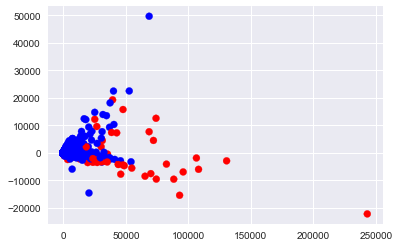

100%|██████████| 5/5 [01:08<00:00, 13.76s/it]


(0.07536346810825803, (-0.011221263836548603, 0.06414220427170943), 0.2551406247166965)
eps =  35 min_samples =  10
{'metric': 'manhattan', 'eps': 35, 'min_samples': 10}
METHOD : dbscan
Variance Explained : 0.9629267095396814 [0.93079208 0.03213463]


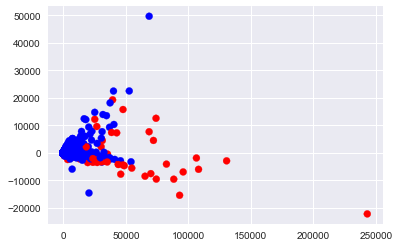

100%|██████████| 5/5 [01:09<00:00, 13.83s/it]


(0.07536346810825803, (-0.011221263836548603, 0.06414220427170943), 0.2551406247166965)
eps =  35 min_samples =  15
{'metric': 'manhattan', 'eps': 35, 'min_samples': 15}
METHOD : dbscan
Variance Explained : 0.9629267095396813 [0.93079208 0.03213463]


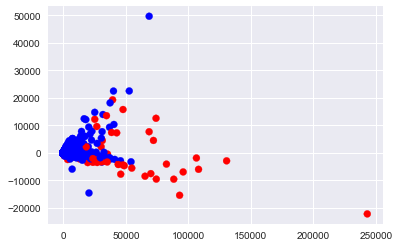

100%|██████████| 5/5 [01:12<00:00, 14.42s/it]


(0.0701190372998886, (-0.013084747904213663, 0.05703428939567493), 0.3087235917326432)
eps =  35 min_samples =  20
{'metric': 'manhattan', 'eps': 35, 'min_samples': 20}
METHOD : dbscan
Variance Explained : 0.9629267095396798 [0.93079208 0.03213463]


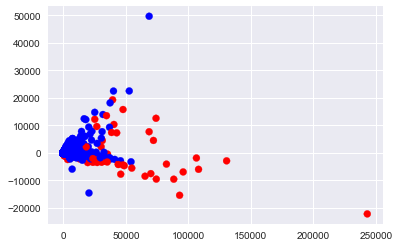

100%|██████████| 5/5 [01:08<00:00, 13.78s/it]


(0.06799481904014874, (-0.01980639404912263, 0.048188424991026116), 0.496726779035244)
eps =  35 min_samples =  25
{'metric': 'manhattan', 'eps': 35, 'min_samples': 25}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


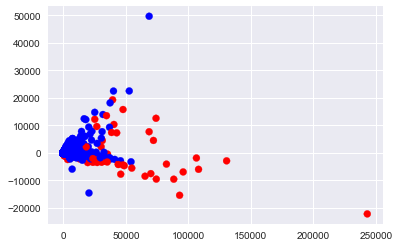

100%|██████████| 5/5 [01:08<00:00, 13.76s/it]

(0.06799481904014874, (-0.01980639404912263, 0.048188424991026116), 0.496726779035244)


In [18]:
### dbscan with varying params for eps = 35
eps_list = [35]
min_samples_list = [8,10,15,20,25]
# eps_list = [40]
# min_samples_list = [5]
for eps in eps_list:
    for min_samples in min_samples_list:
        print("eps = ", eps, "min_samples = ", min_samples)
        out_ids, outliers = cluster(top_users, "dbscan", min_samples = min_samples, eps = eps,  metric = "manhattan")
        print(t_testing(top_users, top_df_list, outliers))

eps =  5 min_samples =  10
{'metric': 'euclidean', 'eps': 5, 'min_samples': 10}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


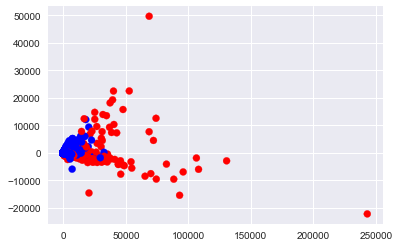

100%|██████████| 5/5 [01:05<00:00, 13.19s/it]


(0.04645117307102105, (-0.028356867445124553, 0.0180943056258965), 0.7170961408372851)
eps =  5 min_samples =  20
{'metric': 'euclidean', 'eps': 5, 'min_samples': 20}
METHOD : dbscan
Variance Explained : 0.9629267095396806 [0.93079208 0.03213463]


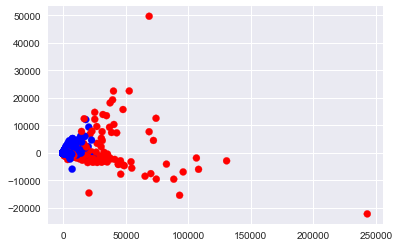

100%|██████████| 5/5 [01:05<00:00, 13.12s/it]


(0.04769976385441965, (-0.025365728456998186, 0.022334035397421462), 0.9169680248888894)
eps =  5 min_samples =  30
{'metric': 'euclidean', 'eps': 5, 'min_samples': 30}
METHOD : dbscan
Variance Explained : 0.9629267095396825 [0.93079208 0.03213463]


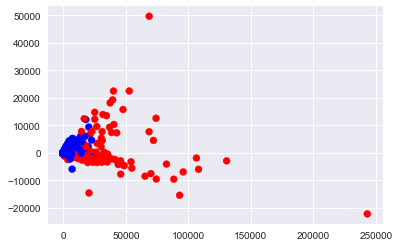

100%|██████████| 5/5 [01:04<00:00, 12.97s/it]


(0.046537328267618, (-0.025932973531577013, 0.020604354736040983), 0.8510113795569263)
eps =  10 min_samples =  10
{'metric': 'euclidean', 'eps': 10, 'min_samples': 10}
METHOD : dbscan
Variance Explained : 0.9629267095396806 [0.93079208 0.03213463]


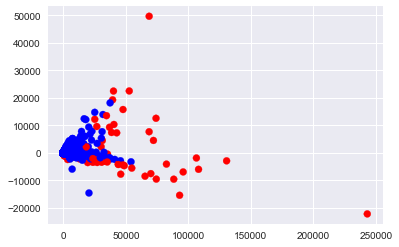

100%|██████████| 5/5 [01:07<00:00, 13.55s/it]


(0.06854618577573499, (-0.01939397962454776, 0.049152206151187226), 0.4794933200468098)
eps =  10 min_samples =  20
{'metric': 'euclidean', 'eps': 10, 'min_samples': 20}
METHOD : dbscan
Variance Explained : 0.962926709539682 [0.93079208 0.03213463]


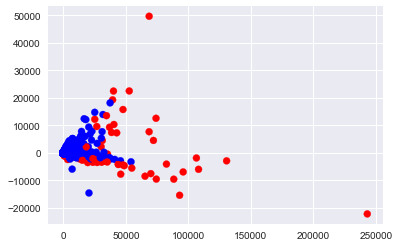

100%|██████████| 5/5 [01:06<00:00, 13.22s/it]


(0.06524486969569553, (-0.01304809263626118, 0.052196777059434346), 0.32853791788801334)
eps =  10 min_samples =  30
{'metric': 'euclidean', 'eps': 10, 'min_samples': 30}
METHOD : dbscan
Variance Explained : 0.9629267095396814 [0.93079208 0.03213463]


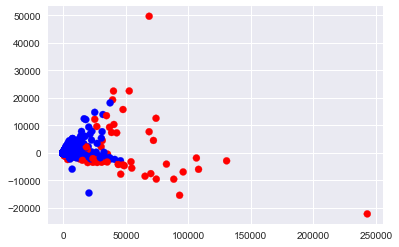

100%|██████████| 5/5 [01:05<00:00, 13.16s/it]


(0.06348388110363908, (-0.017065515313389526, 0.04641836579024955), 0.4506807056447393)
eps =  15 min_samples =  10
{'metric': 'euclidean', 'eps': 15, 'min_samples': 10}
METHOD : dbscan
Variance Explained : 0.962926709539681 [0.93079208 0.03213463]


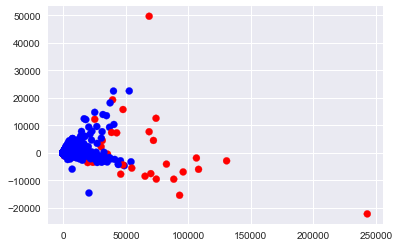

100%|██████████| 5/5 [01:10<00:00, 14.15s/it]


(0.09348589480608807, (-0.011256783374075784, 0.08222911143201228), 0.22207483309221465)
eps =  15 min_samples =  20
{'metric': 'euclidean', 'eps': 15, 'min_samples': 20}
METHOD : dbscan
Variance Explained : 0.962926709539682 [0.93079208 0.03213463]


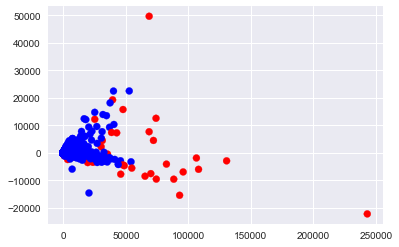

100%|██████████| 5/5 [01:06<00:00, 13.33s/it]


(0.08944503862458879, (-0.010330653104774226, 0.07911438551981456), 0.2156570645115941)
eps =  15 min_samples =  30
{'metric': 'euclidean', 'eps': 15, 'min_samples': 30}
METHOD : dbscan
Variance Explained : 0.9629267095396812 [0.93079208 0.03213463]


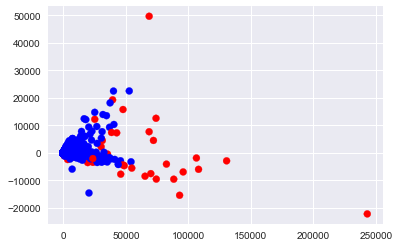

100%|██████████| 5/5 [01:08<00:00, 13.64s/it]


(0.08796764879672132, (-0.008022523316182209, 0.07994512548053911), 0.18827374474597044)
eps =  20 min_samples =  10
{'metric': 'euclidean', 'eps': 20, 'min_samples': 10}
METHOD : dbscan
Variance Explained : 0.9629267095396823 [0.93079208 0.03213463]


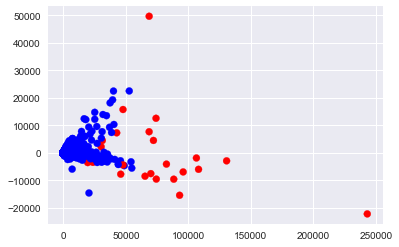

100%|██████████| 5/5 [01:06<00:00, 13.30s/it]


(0.09978236965535452, (-0.02583417565756653, 0.07394819399778799), 0.4375238876041121)
eps =  20 min_samples =  20
{'metric': 'euclidean', 'eps': 20, 'min_samples': 20}
METHOD : dbscan
Variance Explained : 0.9629267095396798 [0.93079208 0.03213463]


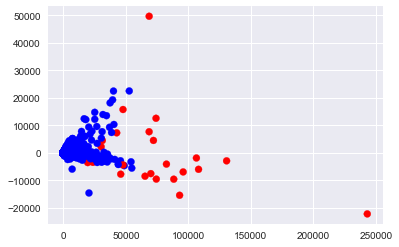

100%|██████████| 5/5 [01:07<00:00, 13.60s/it]


(0.09978236965535452, (-0.02583417565756653, 0.07394819399778799), 0.4375238876041121)
eps =  20 min_samples =  30
{'metric': 'euclidean', 'eps': 20, 'min_samples': 30}
METHOD : dbscan
Variance Explained : 0.9629267095396807 [0.93079208 0.03213463]


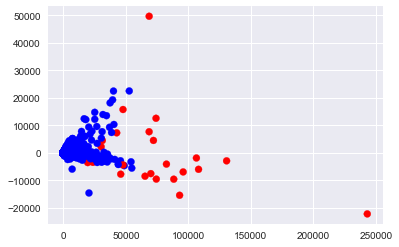

100%|██████████| 5/5 [01:13<00:00, 14.64s/it]

(0.09978236965535452, (-0.02583417565756653, 0.07394819399778799), 0.4375238876041121)


In [19]:
### try with euclidean
eps_list = [5,10,15,20]
min_samples_list = [10,20,30]
# eps_list = [40]
# min_samples_list = [5]
for eps in eps_list:
    for min_samples in min_samples_list:
        print("eps = ", eps, "min_samples = ", min_samples)
        out_ids, outliers = cluster(top_users, "dbscan", min_samples = min_samples, eps = eps,  metric = "euclidean")
        print(t_testing(top_users, top_df_list, outliers))

### Try Kmeans on lesser reviewed data

eps =  20 min_samples =  30
{}
METHOD : kmeans
Variance Explained : 0.9750207849629696 [0.94494782 0.03007297]


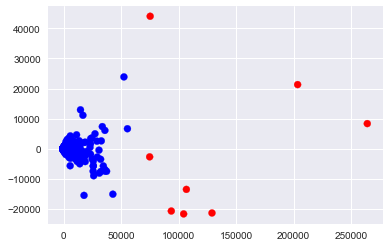

100%|██████████| 5/5 [00:18<00:00,  3.79s/it]

(0.34934654449133357, (-0.014603673310521537, 0.33474287118081203), 0.21231982625364337)


In [22]:
print("eps = ", eps, "min_samples = ", min_samples)
out_ids, outliers = cluster(lesser_users, "kmeans")
print(t_testing(lesser_users, less_df_list, outliers))

### Try dbscan with various params

eps =  20 min_samples =  3
{'metric': 'manhattan', 'eps': 20, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9750207849629706 [0.94494782 0.03007297]


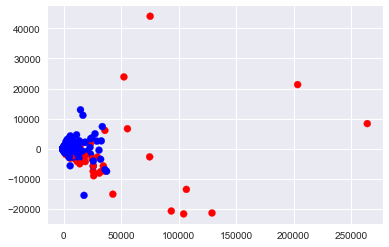

100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


(0.26007635429544834, (-0.027388564943124832, 0.2326877893523235), 0.20589427317103093)
eps =  20 min_samples =  4
{'metric': 'manhattan', 'eps': 20, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9750207849629696 [0.94494782 0.03007297]


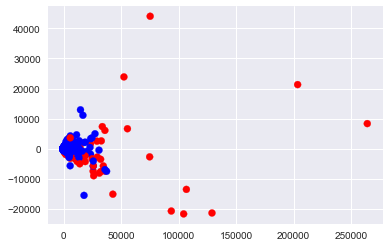

100%|██████████| 5/5 [57:49<00:00, 693.97s/it]


(0.24998312228464004, (-0.05312181692566659, 0.19686130535897345), 0.35318162535419784)
eps =  20 min_samples =  6
{'metric': 'manhattan', 'eps': 20, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9750207849629705 [0.94494782 0.03007297]


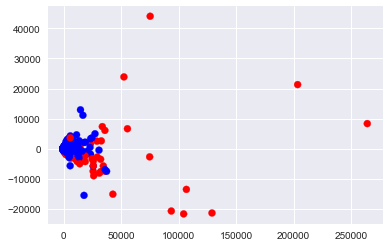

100%|██████████| 5/5 [00:24<00:00,  4.84s/it]


(0.2465108040408879, (-0.08344835768654543, 0.16306244635434247), 0.6006827411982731)
eps =  30 min_samples =  3
{'metric': 'manhattan', 'eps': 30, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9750207849629707 [0.94494782 0.03007297]


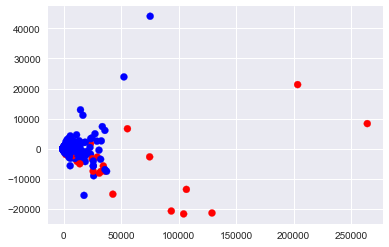

100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


(0.29735885025911213, (-0.14134531709611942, 0.1560135331629927), 0.9373780386365127)
eps =  30 min_samples =  4
{'metric': 'manhattan', 'eps': 30, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9750207849629696 [0.94494782 0.03007297]


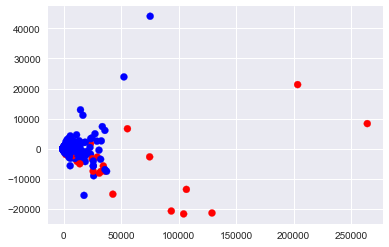

100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


(0.3233040842404237, (-0.10723034602716028, 0.21607373821326342), 0.5924308241235179)
eps =  30 min_samples =  6
{'metric': 'manhattan', 'eps': 30, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9750207849629706 [0.94494782 0.03007297]


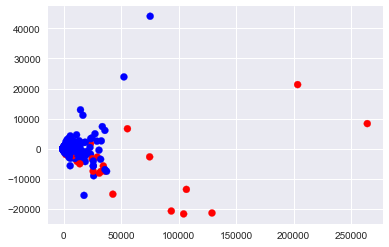

100%|██████████| 5/5 [00:22<00:00,  4.59s/it]


(0.31312997534557424, (-0.09050017000089684, 0.2226298053446774), 0.5023855390759443)
eps =  40 min_samples =  3
{'metric': 'manhattan', 'eps': 40, 'min_samples': 3}
METHOD : dbscan
Variance Explained : 0.9750207849629696 [0.94494782 0.03007297]


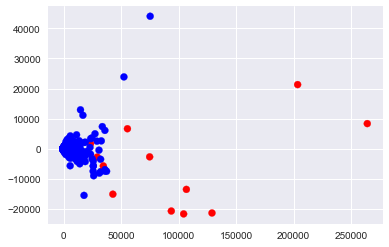

100%|██████████| 5/5 [00:23<00:00,  4.76s/it]


(0.3585748362332145, (-0.1740765692554845, 0.18449826697773003), 0.9641208520352572)
eps =  40 min_samples =  4
{'metric': 'manhattan', 'eps': 40, 'min_samples': 4}
METHOD : dbscan
Variance Explained : 0.9750207849629712 [0.94494782 0.03007297]


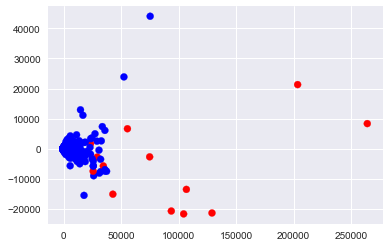

100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


(0.35740881455300083, (-0.13251237844681124, 0.2248964361061896), 0.6886963386940378)
eps =  40 min_samples =  6
{'metric': 'manhattan', 'eps': 40, 'min_samples': 6}
METHOD : dbscan
Variance Explained : 0.9750207849629707 [0.94494782 0.03007297]


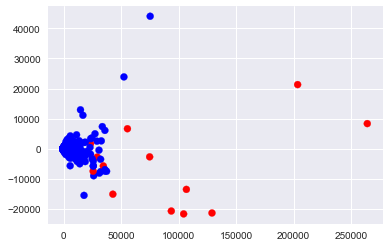

100%|██████████| 5/5 [00:22<00:00,  4.42s/it]

(0.35740881455300083, (-0.13251237844681124, 0.2248964361061896), 0.6886963386940378)


In [26]:
### try with euclidean
eps_list = [20,30,40]
min_samples_list = [3,4,6]
# eps_list = [40]
# min_samples_list = [5]
for eps in eps_list:
    for min_samples in min_samples_list:
        print("eps = ", eps, "min_samples = ", min_samples)
        out_ids, outliers = cluster(lesser_users, "dbscan", min_samples = min_samples, eps = eps,  metric = "manhattan")
        print(t_testing(lesser_users, less_df_list, outliers))